<a href="https://colab.research.google.com/github/Nedddddy/STAT3009/blob/main/STAT3009_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUHK-STAT3009: Homework 2 - More SVD Models **(due Nov 13)**


## **Q1: Basic Usage of SVD for Rating Prediction**

**Importing the SVD Class**

Download the `SVD` class from our GitHub repository: https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py.

**Dataset**

We will use a synthetic dataset to demonstrate the basic usage of SVD for rating prediction. The dataset consists of user ratings for various items, represented by the following DataFrame:
```python
import pandas as pd
data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    'rating': [5, 3, 4, 2, 1, 3, 4, 5, 2, 3]}
df = pd.DataFrame(data)
```

**Task**

Your task is to train an SVD model with $K = 2$ and $\lambda = 0.001$ using the provided dataset and predict the ratings for the following user-item pairs:

* `user_id` = 2, `item_id` = 2
* `user_id` = 5, `item_id` = 1

Implement the SVD model, train it on the dataset, and provide the predicted ratings for the specified user-item pairs.

> The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here.

!wget https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/src/TabRS.py

--2025-11-12 14:29:44--  https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/src/TabRS.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9001 (8.8K) [text/plain]
Saving to: ‘TabRS.py’

TabRS.py            100%[===================>]   8.79K  --.-KB/s    in 0s      

2025-11-12 14:29:44 (79.5 MB/s) - ‘TabRS.py’ saved [9001/9001]



In [ ]:
import pandas as pd
from TabRS import SVD

data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5],
    'item_id': [1, 2, 1, 3, 1, 3, 2, 3, 2, 3],
    'rating': [5, 3, 4, 2, 1, 3, 4, 5, 2, 3]}
df = pd.DataFrame(data)

X_train = df[['user_id', 'item_id']].values
y_train = df['rating'].values

test_data = pd.DataFrame({'user_id': [2, 5], 'item_id': [2, 1]})
X_test = test_data[['user_id', 'item_id']].values

n_users = max(max(X_train[:,0]), max(X_test[:,0])) + 1
n_items = max(max(X_train[:,1]), max(X_test[:,1])) + 1

svdRS = SVD(n_users, n_items, K=2, lam=0.001)
svdRS.fit(X_train, y_train)
y_pred = svdRS.predict(X_test)

for i in range(len(test_data)):
    u, it = test_data.iloc[i]
    print(f"Predicted rating for user {u}, item {it}: {y_pred[i]:.4f}")

Fitting Reg-SVD: K: 2, lam: 0.00100
RegSVD-ALS: 0; obj: 0.034; rmse:0.065, diff: 10.964
RegSVD-ALS: 1; obj: 0.028; rmse:0.040, diff: 0.006
RegSVD-ALS: 2; obj: 0.025; rmse:0.032, diff: 0.003
RegSVD-ALS: 3; obj: 0.023; rmse:0.027, diff: 0.002
RegSVD-ALS: 4; obj: 0.022; rmse:0.024, diff: 0.001
RegSVD-ALS: 5; obj: 0.020; rmse:0.022, diff: 0.001
RegSVD-ALS: 6; obj: 0.019; rmse:0.020, diff: 0.001
RegSVD-ALS: 7; obj: 0.019; rmse:0.019, diff: 0.001
RegSVD-ALS: 8; obj: 0.018; rmse:0.018, diff: 0.001
RegSVD-ALS: 9; obj: 0.017; rmse:0.017, diff: 0.001
Predicted rating for user 2, item 2: 0.6978
Predicted rating for user 5, item 1: 5.2882


## **Q2: Lasso-SVD Recommender Systems**

**Data**

In this task, you will implement a user-item average based recommender system using the Netflix dataset from the CUHK-STAT3009 GitHub repository.

```python
import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
```

**Lasso Regression**

Given a dataset of feature-vectors $\mathbf{x}_i$ and corresponding ground truth scores $y_i$, Lasso regression seeks a sparse solution by minimizing the following objective function:

$$\text{argmin}_{\mathbf{\beta}} \ \frac{1}{n} \sum_{i=1}^n ( y_i - \mathbf{\beta}^T \mathbf{x}_i )^2 + \lambda \| \mathbf{\beta} \|_1, \quad \text{where } \| \mathbf{\beta} \|_1 = \sum_{j=1}^p |\beta_j|$$

This can be efficiently solved using `sklearn.linear_model.Lasso` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)).

### **Task: Lasso Matrix Factorization (Lasso_SVD)**

**Objective**

Implement a Lasso_SVD recommender system by solving the following optimization problem:

$$\boxed{(\widehat{\mathbf P}, \widehat{\mathbf Q}) = \text{argmin}_{\mathbf{P}, \mathbf{Q} } \frac{1}{|\Omega|} \sum_{(u,i) \in \Omega} ( r_{ui} - \mathbf{p}^\intercal_u \mathbf{q}_i  )^2 + \lambda \big(  \sum_{u=1}^n \|\mathbf{p}_u\|_1 + \sum_{i=1}^m \|\mathbf{q}_i\|_1 \big)}$$

**Implementation**

Create a class `Lasso_SVD` with two methods:

1. `Lasso_SVD.fit`: Fit the parameters $\mathbf{P}$ and $\mathbf{Q}$ by solving the optimization problem above using Lasso regression.
2. `Lasso_SVD.predict`: Predict ratings using the fitted parameters: $\widehat{r}_{ui} = \widehat{\mathbf{p}}^T_u \widehat{\mathbf{q}}_i$

**Hint**: Use Alternative Least Square (ALS) logic, where each subproblem is a Lasso regression that can be solved using `sklearn.linear_model.Lasso` (previously, we use `sklearn.linear_model.Ridge`).

**Evaluation**

Print the Root Mean Squared Error (RMSE) for the testing data using the following hyperparameters:

* $(\lambda = 0.1, K = 3)$
* $(\lambda = 0.3, K = 5)$

> Implement the `Lasso_SVD` class with the required methods. The correctness of the implementation will be evaluated based on the code structure and logic, not on the final evaluation results.

In [ ]:
## Your solution here

import numpy as np
import pandas as pd

# Load the Netflix dataset from the CUHK-STAT3009 GitHub repository
# Repository link: https://github.com/statmlben/CUHK-STAT3009/tree/main/dataset/netflix

train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

# Convert DataFrame to NumPy arrays
X_train = train[['user_id', 'movie_id']].values
y_train = train['rating'].values
X_test = test[['user_id', 'movie_id']].values
y_test = test['rating'].values

n_users = max(max(X_train[:,0]), max(X_test[:,0])) + 1
n_items = max(max(X_train[:,1]), max(X_test[:,1])) + 1

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model import Lasso

class Lasso_SVD(BaseEstimator):

    def __init__(self, n_users, n_items, lam=0.1, K=5, iterNum=10, tol=1e-4, verbose=1):
        self.mu = 0.0
        self.a = np.zeros(n_users)
        self.b = np.zeros(n_items)
        self.P = np.random.randn(n_users, K)
        self.Q = np.random.randn(n_items, K)
        self.n_users = n_users
        self.n_items = n_items
        self.K = K
        self.lam = lam
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose

    def fit(self, X, y):

        n_users, n_items, n_obs = self.n_users, self.n_items, len(X)
        K, lam = self.K, self.lam
        diff = 1.0

        if self.verbose:
            print(f"Fitting Lasso-SVD: K={self.K}, λ={self.lam}")

        # Precompute index lists for efficiency
        self.index_item = [np.where(X[:,1] == i)[0] for i in range(n_items)]
        self.index_user = [np.where(X[:,0] == u)[0] for u in range(n_users)]

        for it in range(self.iterNum):
            obj_old = self.obj(X, y)

            self.mu = np.mean(y - self.predict(X) + self.mu)

            for item_id in range(n_items):
                idx_i = self.index_item[item_id]
                if len(idx_i) == 0:
                    self.Q[item_id,:] = 0.0
                    continue
                y_i = y[idx_i]
                X_i = X[idx_i]
                U_i = X_i[:,0]
                self.b[item_id] = np.mean(y_i - self.predict(X_i) + self.b[item_id])
                res_i = y_i - self.mu - self.b[item_id] - self.a[U_i]
                P_i = self.P[U_i]
                clf = Lasso(alpha=lam, fit_intercept=False, max_iter=2000)
                clf.fit(P_i, res_i)
                self.Q[item_id,:] = clf.coef_

            for user_id in range(n_users):
                idx_u = self.index_user[user_id]
                if len(idx_u) == 0:
                    self.P[user_id,:] = 0.0
                    continue
                y_u = y[idx_u]
                X_u = X[idx_u]
                I_u = X_u[:,1]
                self.a[user_id] = np.mean(y_u - self.predict(X_u) + self.a[user_id])
                res_u = y_u - self.mu - self.b[I_u] - self.a[user_id]
                Q_u = self.Q[I_u]
                clf = Lasso(alpha=lam, fit_intercept=False, max_iter=2000)
                clf.fit(Q_u, res_u)
                self.P[user_id,:] = clf.coef_

            obj_new = self.obj(X, y)
            diff = abs(obj_old - obj_new)
            rmse_tmp = np.sqrt(self.mse(X, y))
            if self.verbose:
                print(f"Lasso-SVD ALS: iter={it+1}; obj={obj_new:.4f}; rmse={rmse_tmp:.4f}; diff={diff:.4f}")
            if diff < self.tol:
                break
        return self

    def predict(self, X):
        return np.array([
            self.mu + self.a[u] + self.b[i] + np.dot(self.P[u], self.Q[i])
            for u, i in X
        ])

    def mse(self, X, y):
        return np.mean((self.predict(X) - y)**2)

    def obj(self, X, y):
        mse_tmp = self.mse(X, y)
        pen_tmp = np.sum(np.abs(self.P)) + np.sum(np.abs(self.Q))
        return mse_tmp + self.lam * pen_tmp


In [ ]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
model1 = Lasso_SVD(n_users, n_items, K=3, lam=0.1)
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
rmse1 = rmse(y_test, pred1)
print(f"lam=0.1, K=3, Test RMSE = {rmse1:.4f}")

Fitting Lasso-SVD: K=3, λ=0.1


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=1; obj=305.9754; rmse=0.9196; diff=1048.6176


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=2; obj=181.7118; rmse=0.8596; diff=124.2636


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=3; obj=129.9510; rmse=0.8551; diff=51.7609


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=4; obj=113.5058; rmse=0.8543; diff=16.4452


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=5; obj=105.4124; rmse=0.8542; diff=8.0933


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=6; obj=100.2008; rmse=0.8543; diff=5.2116


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=7; obj=95.4242; rmse=0.8545; diff=4.7766


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=8; obj=90.8906; rmse=0.8546; diff=4.5336


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=9; obj=88.0154; rmse=0.8545; diff=2.8752


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=10; obj=86.4251; rmse=0.8546; diff=1.5903
lam=0.1, K=3, Test RMSE = 0.9827


In [ ]:
model2 = Lasso_SVD(n_users, n_items, K=5, lam=0.3)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
rmse2 = rmse(y_test, pred2)
print(f"lam=0.3, K=5, Test RMSE = {rmse2:.4f}")

Fitting Lasso-SVD: K=5, λ=0.3


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.502e-04, tolerance: 8.962e-04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=1; obj=684.5576; rmse=1.0067; diff=5998.3759


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=2; obj=115.8068; rmse=0.8770; diff=568.7508


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=3; obj=35.2346; rmse=0.8722; diff=80.5722


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=4; obj=18.5068; rmse=0.8713; diff=16.7278


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=5; obj=13.2669; rmse=0.8714; diff=5.2399


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=6; obj=7.1989; rmse=0.8715; diff=6.0681


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=7; obj=3.8966; rmse=0.8714; diff=3.3023


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=8; obj=3.0344; rmse=0.8714; diff=0.8621


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=9; obj=2.6104; rmse=0.8714; diff=0.4240


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e

Lasso-SVD ALS: iter=10; obj=2.3097; rmse=0.8714; diff=0.3007
lam=0.3, K=5, Test RMSE = 0.9712


## **Q3: Kaggle Submission by Neural Networks**

**Task**

- Create an arbitrary Neural Network with Dense layers and Make a Submission to the Kaggle Competition: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

- Paste the submission results screenshot into this Jupyter Notebook.

In [ ]:
## Your submission result here

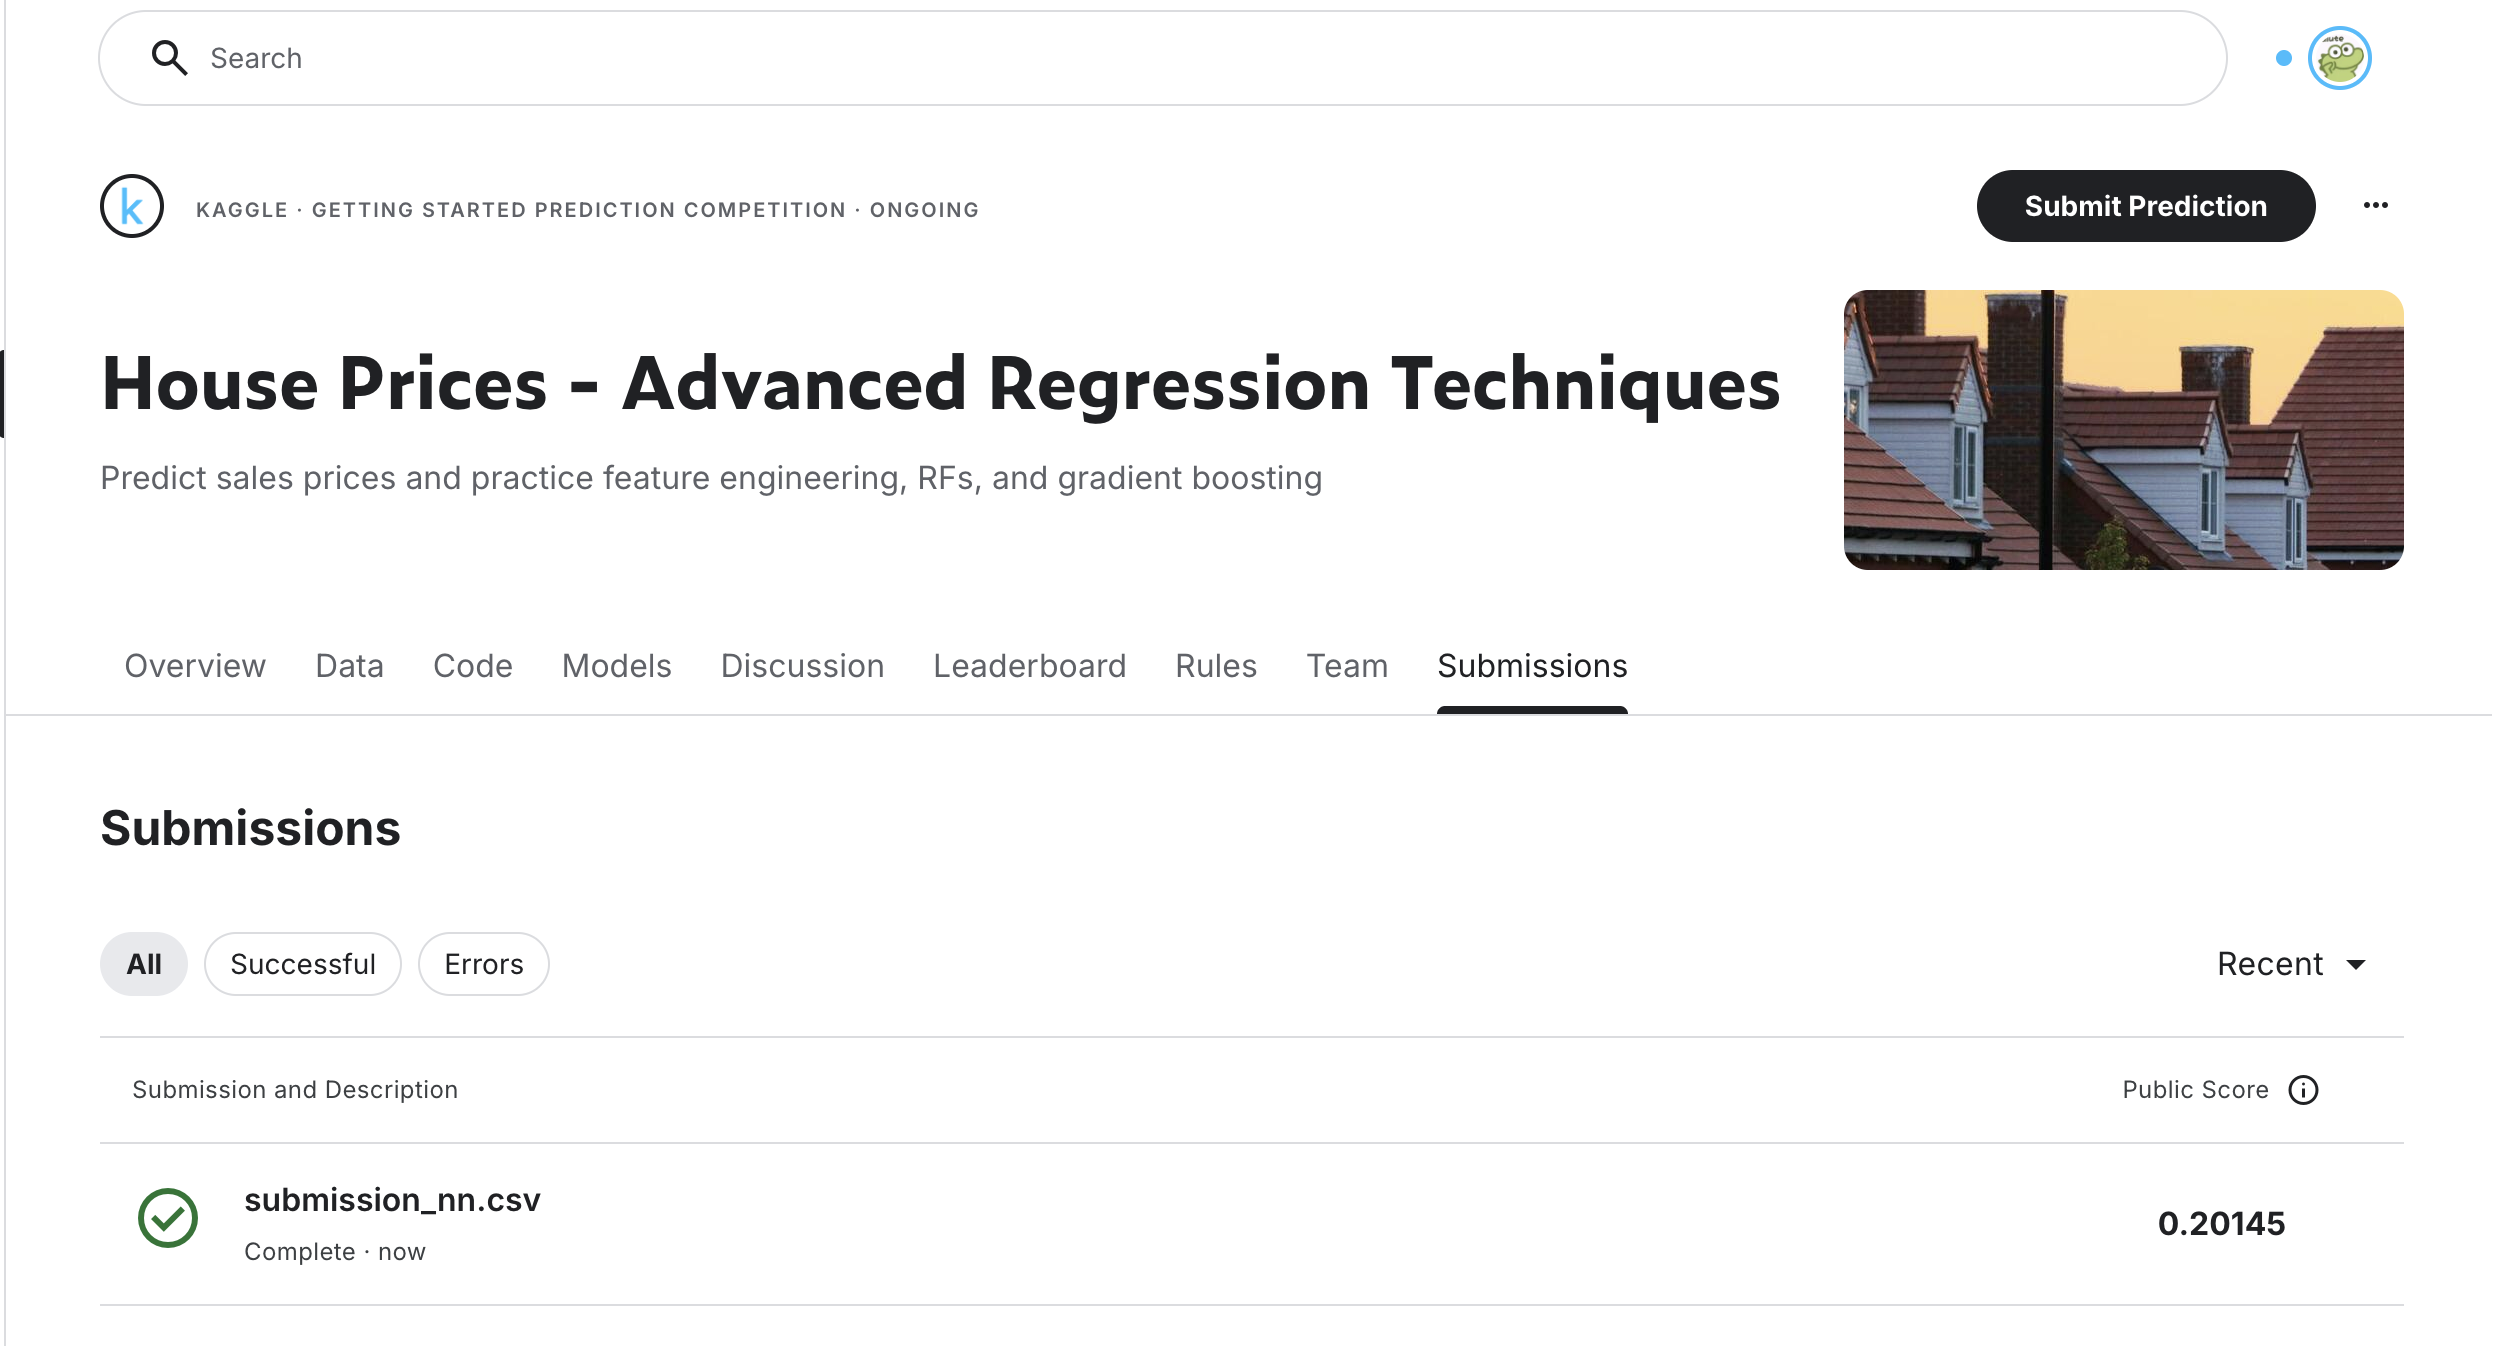

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from tensorflow import keras

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

X_train = train.drop(columns=['Id', 'SalePrice'])
X_test = test.drop(columns=['Id'])
y_train = np.log1p(train['SalePrice'])

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

numeric = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer([
    ('num', numeric, num_cols),
    ('cat', categorical, cat_cols)
])

X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X_train.shape[1]]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss='mse',
    metrics=[keras.metrics.RootMeanSquaredError()]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    batch_size=64,
    epochs=40,
    verbose=1
)

y_pred = np.expm1(model.predict(X_test))
sub['SalePrice'] = y_pred.flatten()
sub.to_csv('submission_nn.csv', index=False)
print("submission_nn.csv saved successfully.")

## **Q4 (Bonus): Parallel Alternating Least Squares (ALS) for Matrix Factorization**


**Background**

Recall the item and user updates for `SVD` based on ALS:

$$\mathbf{q}^{(l+1)}_i = \left(\sum_{u \in \mathcal{U}_i} \mathbf{p}^{(l)}_u (\mathbf{p}^{(l)}_u)^T + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{u \in \mathcal{U}_i} r_{ui} \mathbf{p}^{(l)}_u$$

$$\mathbf{p}^{(l+1)}_u = \left(\sum_{i \in \mathcal{I}_u} \mathbf{q}^{(l+1)}_i (\mathbf{q}^{(l+1)}_i)^\intercal + \lambda |\Omega| \mathbf{I}\right)^{-1} \sum_{i \in \mathcal{I}_u} r_{ui} \mathbf{q}^{(l+1)}_i$$

The key observation is that the updates for user-$u$ and item-$i$ are independent of other users and items, respectively. Therefore, they can be performed in parallel.

Suppose you have 100 users to update, the basic ALS updates user 1, user 2, ..., user 100 sequentially in a loop. Now, suppose you have 100 CPUs, the parallel ALS can update 100 users simultaneously by distributing each user to a different CPU, significantly reducing the computation time.

**Tasks**

1. **Parallelize the `SVD.fit` method**: Revise the `SVD.fit` method (available in [repo](https://github.com/statmlben/CUHK-STAT3009/blob/main/src/TabRS.py)) to allow parallel updating of $\mathbf{p}_u$ and $\mathbf{q}_i$ using Python libraries such as [multiprocessing](https://docs.python.org/3/library/multiprocessing.html) or [pymp](https://github.com/classner/pymp).
2. **Compare computation times**: Compare the computation time for `SVD.fit` with and without parallel computing using the `%%time` magic command (see [ref](https://stackoverflow.com/questions/32565829/simple-way-to-measure-cell-execution-time-in-ipython-notebook)).

In [ ]:
# check number of CPUs in your PC/Node
!lscpu

Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:              6
    Model:                   79
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                0
    BogoMIPS:                4399.99
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   

In [ ]:
## You solution here

import numpy as np
import pandas as pd
from multiprocessing import Pool
from sklearn.metrics import mean_squared_error
import time

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [ ]:
def update_user(args):
    user_id, X, y, Q, lam, K = args
    idx = np.where(X[:,0] == user_id)[0]
    if len(idx) == 0: return np.zeros(K)
    items, r_u = X[idx,1], y[idx]
    A = Q[items].T @ Q[items] + lam * np.eye(K)
    b = Q[items].T @ r_u
    return np.linalg.solve(A, b)

def update_item(args):
    item_id, X, y, P, lam, K = args
    idx = np.where(X[:,1] == item_id)[0]
    if len(idx) == 0: return np.zeros(K)
    users, r_i = X[idx,0], y[idx]
    A = P[users].T @ P[users] + lam * np.eye(K)
    b = P[users].T @ r_i
    return np.linalg.solve(A, b)

In [ ]:
class ParallelSVD:
    """Matrix Factorization using parallel Alternating Least Squares (ALS)"""

    def __init__(self, n_users, n_items, lam=0.01, K=10, iterNum=10,
                 tol=1e-4, verbose=1, n_jobs=4):
        self.n_users = n_users
        self.n_items = n_items
        self.lam = lam
        self.K = K
        self.iterNum = iterNum
        self.tol = tol
        self.verbose = verbose
        self.n_jobs = n_jobs
        self.P = np.random.randn(n_users, K)
        self.Q = np.random.randn(n_items, K)

    def fit(self, X, y):
        """train model using parallel ALS"""
        for it in range(self.iterNum):
            obj_old = self.obj(X, y)

            # parallel update of item latent factors
            with Pool(processes=self.n_jobs) as pool:
                args = [(i, X, y, self.P, self.lam, self.K)
                        for i in range(self.n_items)]
                self.Q = np.array(pool.map(update_item, args))

            # parallel update of user latent factors
            with Pool(processes=self.n_jobs) as pool:
                args = [(u, X, y, self.Q, self.lam, self.K)
                        for u in range(self.n_users)]
                self.P = np.array(pool.map(update_user, args))

            obj_new = self.obj(X, y)
            if self.verbose:
                print(f"[Parallel] Iter {it+1}: obj={obj_new:.4f}")
            if abs(obj_new - obj_old) < self.tol:
                break
        return self

    def predict(self, X):
        """predict ratings for given (user,item) pairs"""
        return np.sum(self.P[X[:, 0]] * self.Q[X[:, 1]], axis=1)

    def mse(self, X, y):
        """mean squared error"""
        return np.mean((self.predict(X) - y) ** 2)

    def obj(self, X, y):
        """objective = mse + regularization"""
        mse_val = self.mse(X, y)
        reg = self.lam * (np.sum(self.P ** 2) + np.sum(self.Q ** 2))
        return mse_val + reg

    def score(self, X, y):
        """root mean squared error"""
        return rmse(y, self.predict(X))

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/statmlben/CUHK-STAT3009/main/dataset/netflix/test.csv')

X_train = train[['user_id', 'movie_id']].values
y_train = train['rating'].values
X_test = test[['user_id', 'movie_id']].values
y_test = test['rating'].values

n_users = max(max(X_train[:,0]), max(X_test[:,0])) + 1
n_items = max(max(X_train[:,1]), max(X_test[:,1])) + 1

In [ ]:
%%time
model = SVD(n_users, n_items, lam=0.05, K=10)
model.fit(X_train, y_train)

Fitting Reg-SVD: K: 10, lam: 0.05000
RegSVD-ALS: 0; obj: 1.335; rmse:1.153, diff: 2804.890
RegSVD-ALS: 1; obj: 0.762; rmse:0.873, diff: 0.573
RegSVD-ALS: 2; obj: 0.760; rmse:0.872, diff: 0.003
RegSVD-ALS: 3; obj: 0.759; rmse:0.871, diff: 0.000
RegSVD-ALS: 4; obj: 0.759; rmse:0.871, diff: 0.000
CPU times: user 26.4 s, sys: 54.4 ms, total: 26.4 s
Wall time: 26.6 s


SVD(K=10, lam=0.05, n_items=np.int64(3568), n_users=np.int64(2000))

In [ ]:
%%time
model = ParallelSVD(n_users, n_items, lam=0.05, K=10)
model.fit(X_train, y_train)

[Parallel] Iter 1: obj=9484.2774
[Parallel] Iter 2: obj=4804.3601
[Parallel] Iter 3: obj=3453.2359
[Parallel] Iter 4: obj=3068.5748
[Parallel] Iter 5: obj=2860.6753
[Parallel] Iter 6: obj=2715.5048
[Parallel] Iter 7: obj=2604.7760
[Parallel] Iter 8: obj=2518.5980
[Parallel] Iter 9: obj=2449.9313
[Parallel] Iter 10: obj=2394.5024
CPU times: user 1.33 s, sys: 1.1 s, total: 2.43 s
Wall time: 8.66 s
